In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thư viện tiền xử lý và mô hình
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold, cross_validate, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score ,mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [2]:
diamond  = pd.read_csv('D:\may_hoc_thong_ke\Diamonds Prices2022.csv', index_col=0)

In [3]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


### Khám phá dữ liệu

In [ ]:
# kiểm tra thông tin data
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53943 entries, 1 to 53943
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [52]:
#thông kê dữ liệu
print(diamond.describe())

              carat           cut         color       clarity         depth  \
count  53775.000000  53775.000000  53775.000000  53775.000000  53775.000000   
mean       0.748817      2.553993      2.593733      3.836039     61.775595   
std        0.394942      1.027579      1.701271      1.724817      1.090149   
min        0.200000      0.000000      0.000000      0.000000     58.800000   
25%        0.400000      2.000000      1.000000      2.000000     61.200000   
50%        0.700000      2.000000      3.000000      4.000000     61.800000   
75%        1.010000      3.000000      4.000000      5.000000     62.500000   
max        2.000000      4.000000      6.000000      7.000000     64.700000   

              table         price             x             y             z  
count  53775.000000  53775.000000  53775.000000  53775.000000  53775.000000  
mean      57.374248   3931.220288      5.729828      5.731983      3.538181  
std        2.062337   3985.918716      1.115513      1

In [6]:
#kiểm tra xem có bị thiếu data không
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
#kiểm tra dữ liệu có bị trùng lập không
diamond.duplicated().sum()

149

In [8]:
#lấy ra những cột số
num_diamond = diamond.select_dtypes(include="number")
num_col = diamond.select_dtypes(include="number").columns

<Axes: >

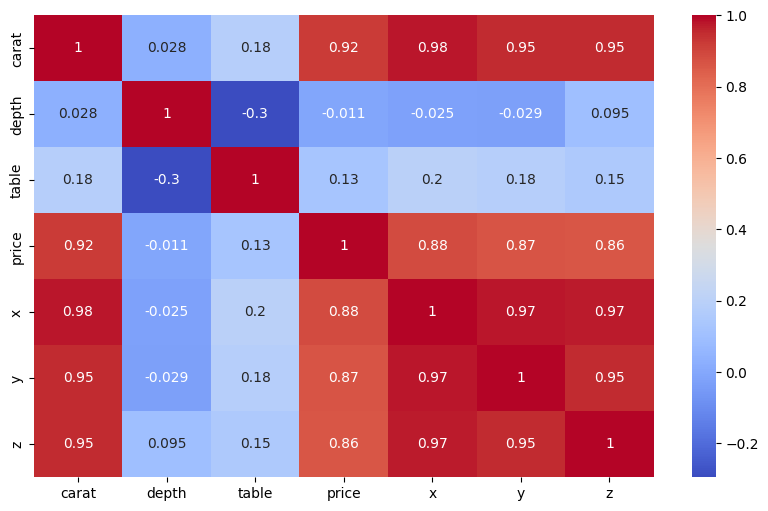

In [9]:
#kiểm tra mối tương quan giữa các biến
plt.figure(figsize=(10,6))
sns.heatmap(num_diamond.corr(),  annot=True, cmap="coolwarm")

### nhận xét:
từ biểu đồ này, ban đầu ta có thể thấy các biến ảnh hưởng nhiều tới price là x,y,z, carat

có thể xem xét gữi lại làm biến cho mô hình

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

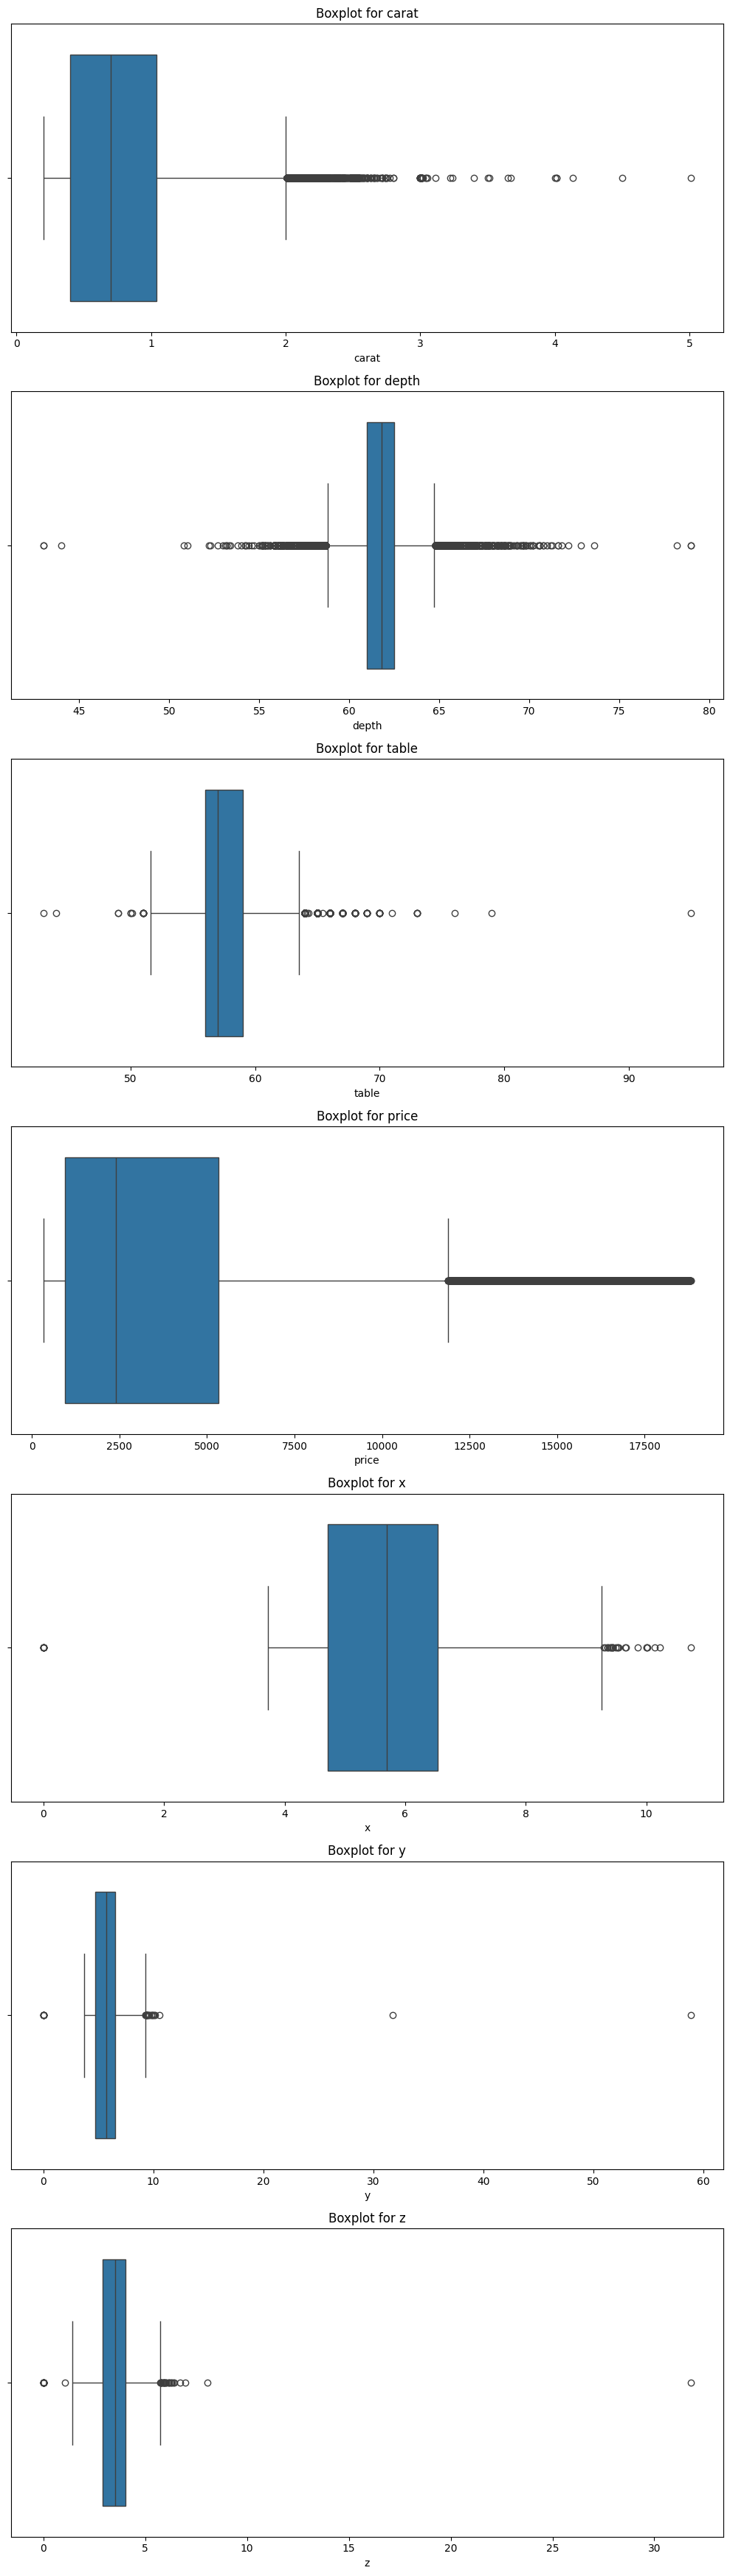

In [10]:
#kiểm tra outlier
# Vẽ Boxplot cho từng cột số
plt.figure(figsize=(10, 5 * len(num_col)))  # Điều chỉnh kích thước biểu đồ

for i, column in enumerate(num_col):
    plt.subplot(len(num_col), 1, i + 1)  # Số lượng hàng = số cột số
    sns.boxplot(x=diamond[column])
    plt.title(f"Boxplot for {column}")
    plt.xlabel(column)

plt.tight_layout()  # Căn chỉnh bố cục
plt.show()

In [11]:
#kiểm tra biến phân loại
cut = diamond['cut'].value_counts()
color = diamond['color'].value_counts()
clarity = diamond['clarity'].value_counts()
print(cut)  
print(color)
print(clarity)

cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64
color
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


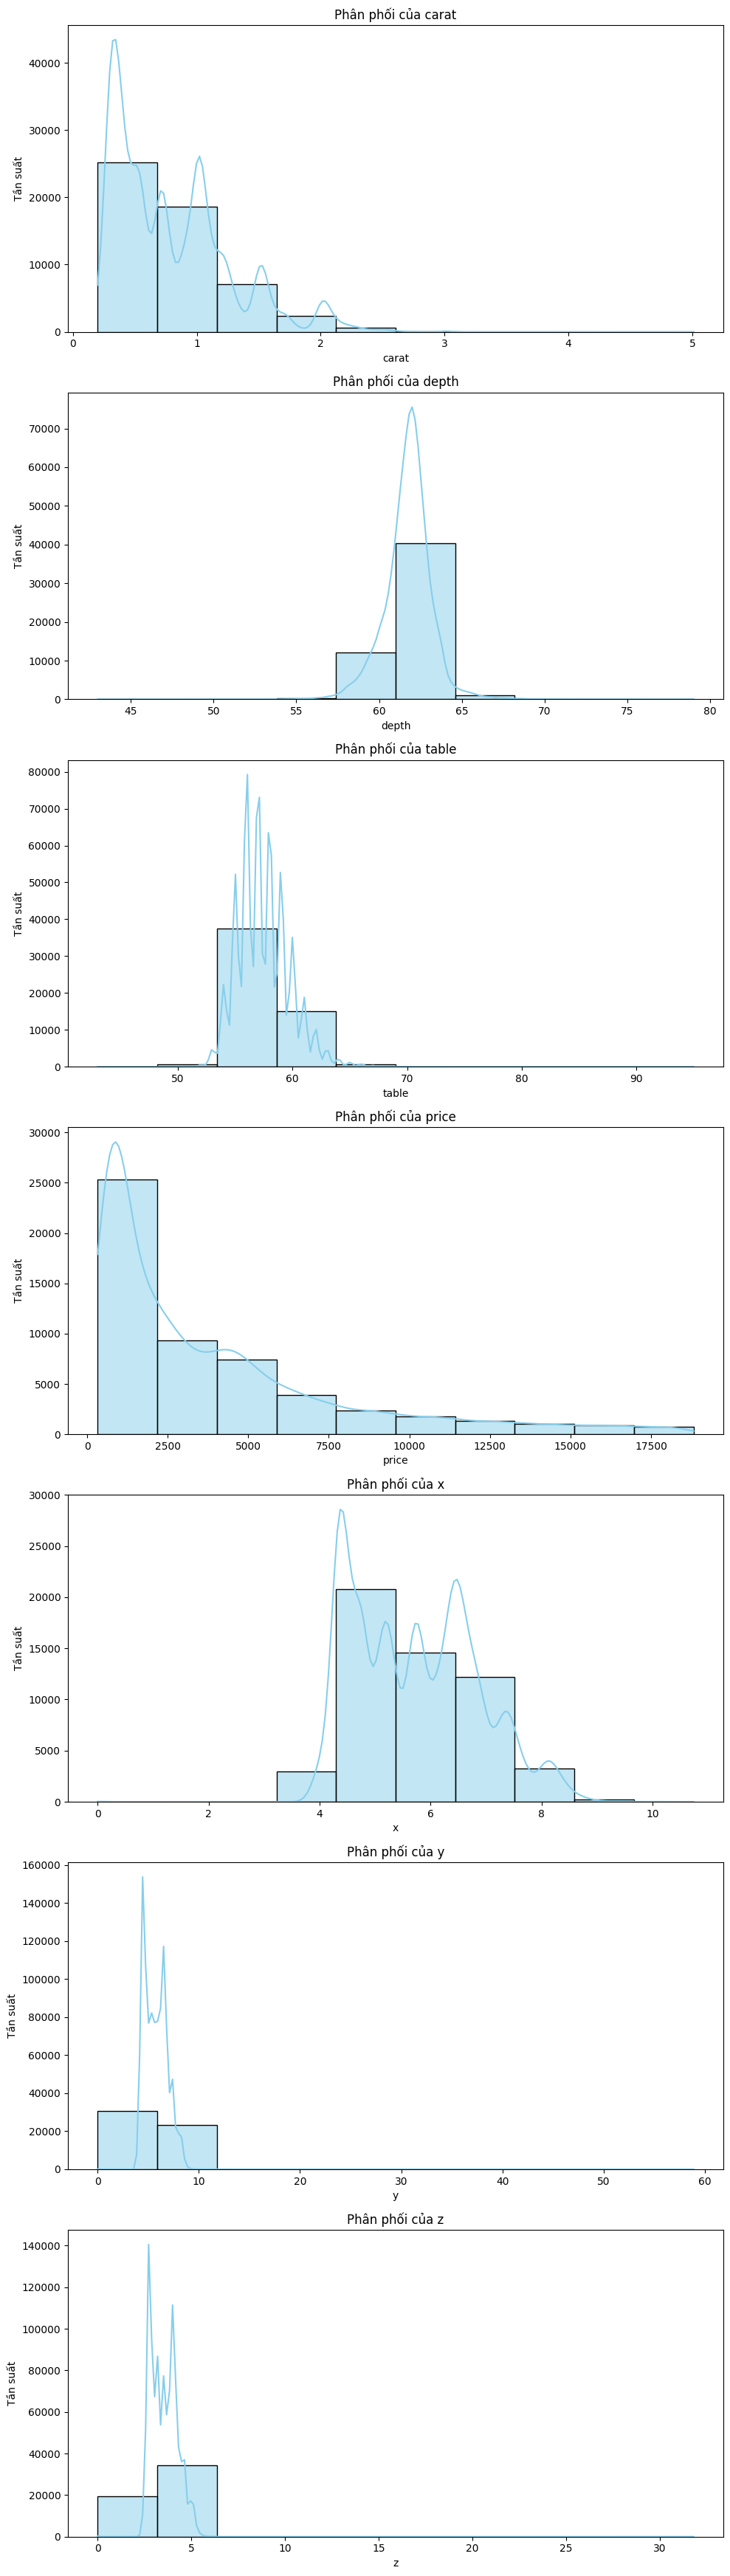

In [12]:
# kiểm tra phân phối chuẩn
plt.figure(figsize=(10, 5 * len(num_col)))  # Điều chỉnh chiều cao theo số biến
for i, column in enumerate(num_col):
    plt.subplot(len(num_col), 1, i + 1)
    sns.histplot(diamond[column], kde=True, bins=10, color="skyblue")
    plt.title(f"Phân phối của {column}")
    plt.xlabel(column)
    plt.ylabel("Tần suất")

plt.tight_layout()  # Căn chỉnh bố cục
plt.show()

### nhận xét:
từ những biểu đồ trên ta thấy, các biến đều theo phân phấn chuẩn, chỉ có biến price là không theo phân phối chuẩn

In [13]:
# Danh sách các cột để kiểm tra tương quan với 'price'
columns_to_plot = ['carat', 'depth', 'table', 'x', 'y', 'z']

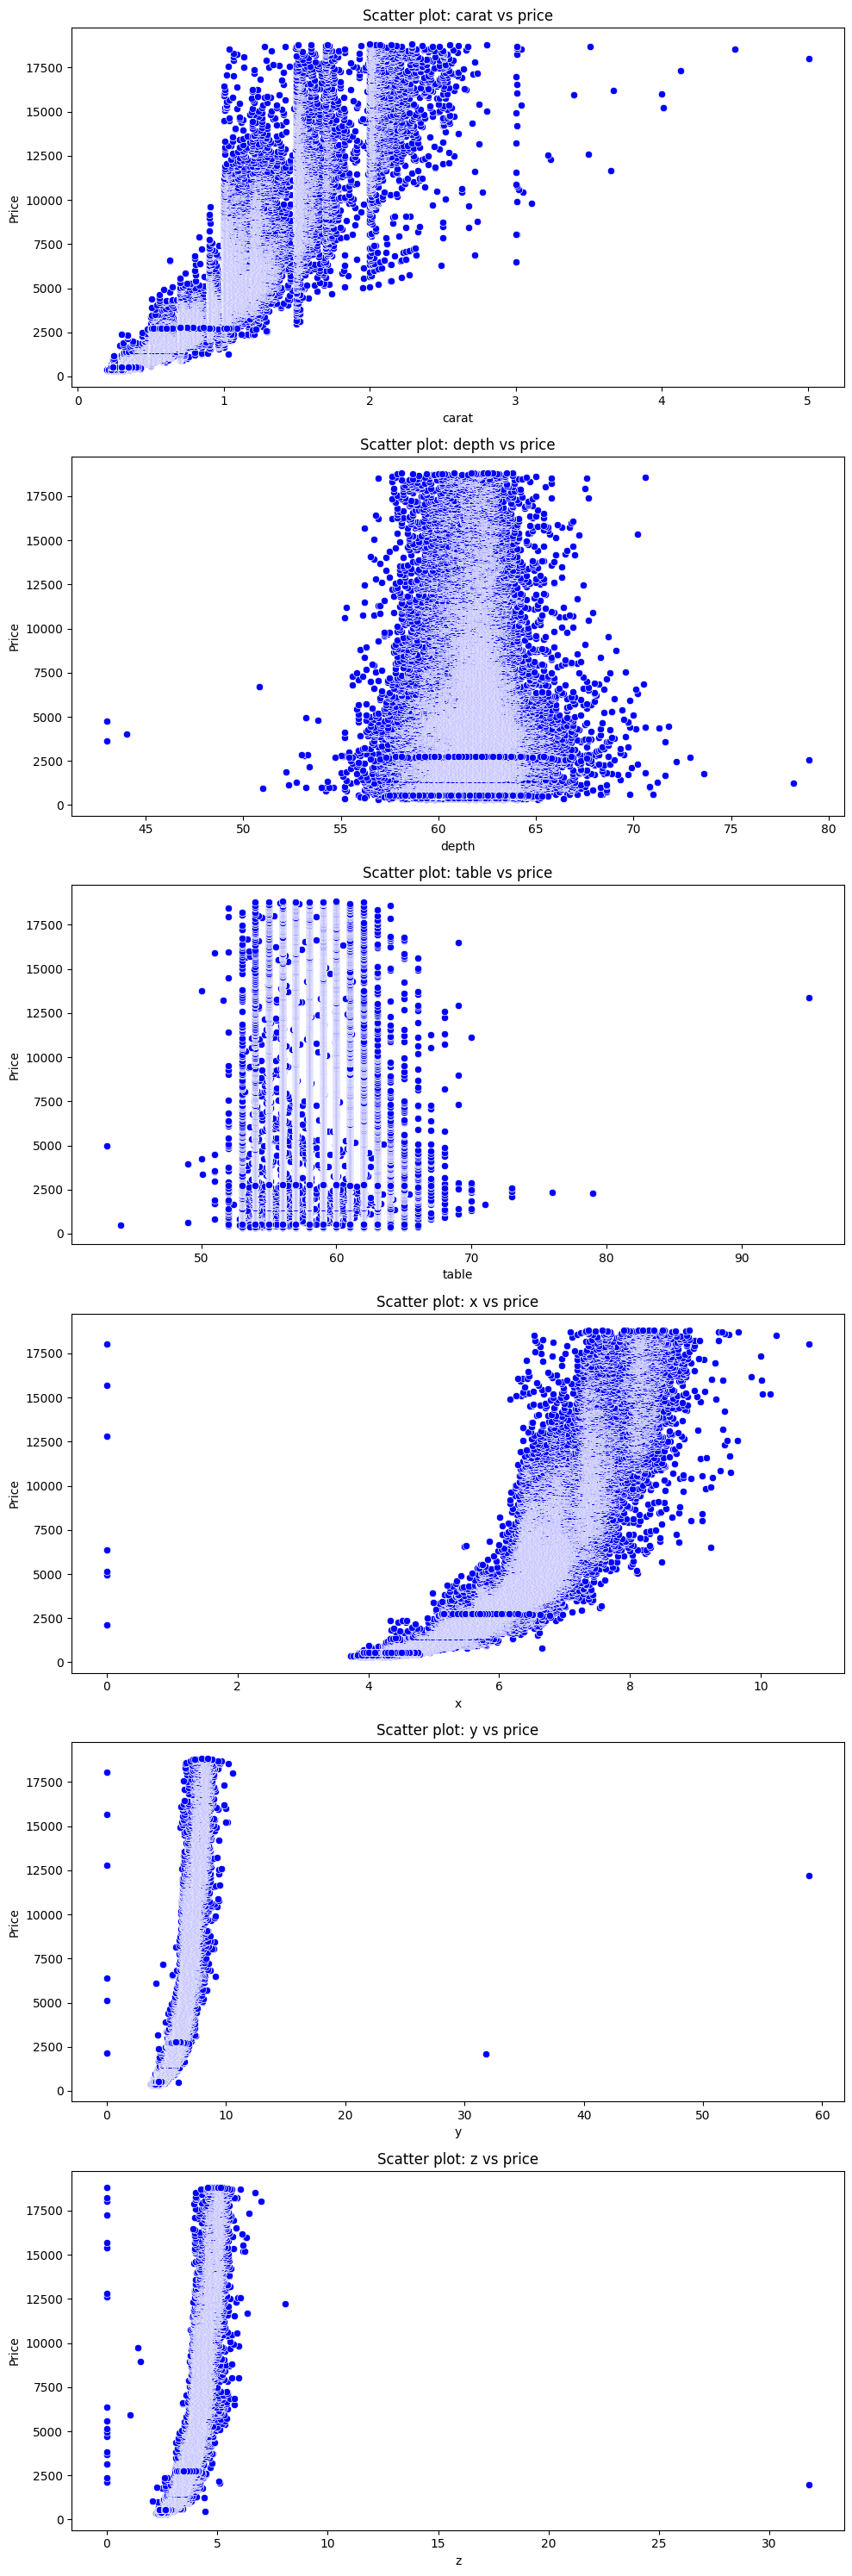

In [14]:
# Vẽ scatter plot cho từng cột
plt.figure(figsize=(10, 5 * len(columns_to_plot)))  # Điều chỉnh chiều cao
for i, column in enumerate(columns_to_plot):
    plt.subplot(len(columns_to_plot), 1, i + 1)
    sns.scatterplot(x=diamond[column], y=diamond['price'], color='blue')
    plt.title(f"Scatter plot: {column} vs price")
    plt.xlabel(column)
    plt.ylabel("Price")

plt.tight_layout()
plt.show()

### nhận xét:
từ những biểu đồ trên, hầu hết các biến đều có tỉ lệ thuận với price chỉ có table và depth là dao động quanh một khoảng nhất định 

In [15]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [16]:
for i in ['x','y','z']:
    zero_count = (diamond[i] == 0).sum()  # Số lượng giá trị 0
    zero_percentage = (zero_count / len(diamond)) * 100  # Phần trăm giá trị 0
    print(f"Column: {i}")
    print(f"Zero Count: {zero_count}")
    print(f"Zero Percentage: {zero_percentage:.2f}%\n")


Column: x
Zero Count: 8
Zero Percentage: 0.01%

Column: y
Zero Count: 7
Zero Percentage: 0.01%

Column: z
Zero Count: 20
Zero Percentage: 0.04%



### tiền xử lý dữ liệu

In [17]:
#loại bỏ giá trị trùng lặp
diamond = diamond.drop_duplicates()

In [18]:
#loại bỏ những hàng có giá trị 0 trong cột x,y,z
diamond = diamond[(diamond[['x', 'y', 'z']] != 0).all(axis=1)]

In [19]:
#xử lý biến phân loại
#khởi tạo label encoder
LabelEncoder = LabelEncoder()

In [20]:
#mã hóa biến phân loại thành số
diamond['cut'] =  LabelEncoder.fit_transform(diamond['cut'])
diamond['color'] =  LabelEncoder.fit_transform(diamond['color'])
diamond['clarity'] =  LabelEncoder.fit_transform(diamond['clarity'])

<Axes: >

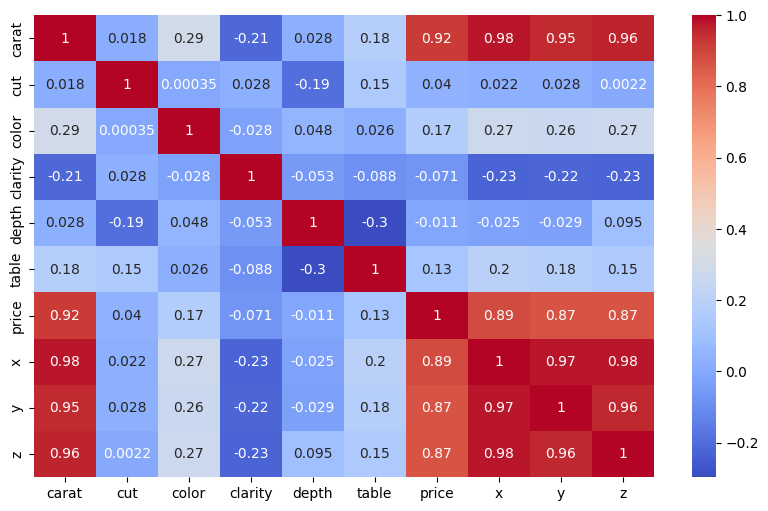

In [21]:
#kiểm tra lại mối tương quan giữa các biến
plt.figure(figsize=(10,6))
sns.heatmap(diamond.corr(),  annot=True, cmap="coolwarm")

### nhận xét:
ta thấy mối tượng quan giữa các biến với price không thay đổi gì

In [22]:
#xử lý outlier
# 1. Hàm phát hiện outlier bằng IQR
def detect_outliers(column):
    """
    Phát hiện outlier dựa trên IQR.
    Trả về một mảng boolean, True nếu là outlier.
    """
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# 2. Hàm chuyển outlier thành NaN
def replace_outliers_with_nan(df, column_name):
    """
    Chuyển các outlier trong một cột thành NaN.
    """
    outlier_mask = detect_outliers(df[column_name])
    df[column_name] = df[column_name].where(~outlier_mask, np.nan)

# 3. Hàm thay NaN bằng mean
def fill_nan_with_mean(df, column_name):
    """
    Thay các giá trị NaN trong cột bằng giá trị trung bình.
    """
    mean_value = df[column_name].mean()
    df[column_name] = df[column_name].fillna(mean_value)


In [23]:
num_col

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [24]:
for col in num_col.drop('price'):
    replace_outliers_with_nan(diamond, col)  # Chuyển outlier thành NaN
    fill_nan_with_mean(diamond, col)  # Thay NaN bằng mean

In [25]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,2,1,3,61.500000,55.000000,326,3.95,3.98,2.43
2,0.21,3,1,2,59.800000,61.000000,326,3.89,3.84,2.31
3,0.23,1,1,4,61.775595,57.374248,327,4.05,4.07,2.31
4,0.29,3,5,5,62.400000,58.000000,334,4.20,4.23,2.63
5,0.31,1,6,3,63.300000,58.000000,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,2,0,2,60.800000,57.000000,2757,5.75,5.76,3.50
53937,0.72,1,0,2,63.100000,55.000000,2757,5.69,5.75,3.61
53938,0.70,4,0,2,62.800000,60.000000,2757,5.66,5.68,3.56
53939,0.86,3,4,3,61.000000,58.000000,2757,6.15,6.12,3.74


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

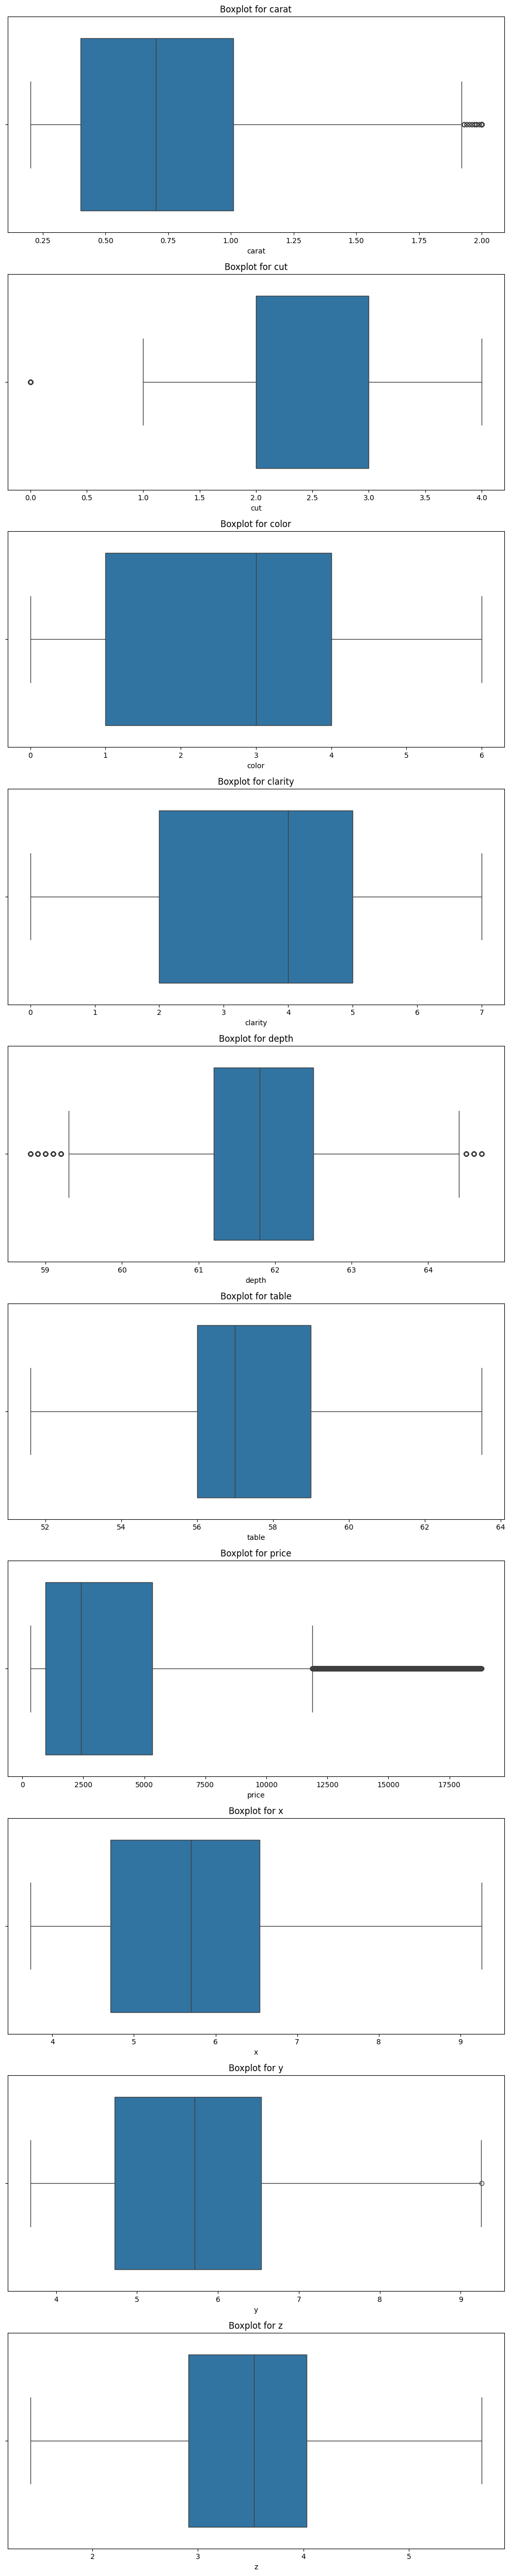

In [26]:
#kiểm tra lại outlier
# Vẽ Boxplot cho từng cột số
plt.figure(figsize=(10, 5 * len(diamond.columns)))  # Điều chỉnh kích thước biểu đồ

for i, column in enumerate(diamond.columns):
    plt.subplot(len(diamond.columns), 1, i + 1)  # Số lượng hàng = số cột số
    sns.boxplot(x=diamond[column])
    plt.title(f"Boxplot for {column}")
    plt.xlabel(column)

plt.tight_layout()  # Căn chỉnh bố cục
plt.show()

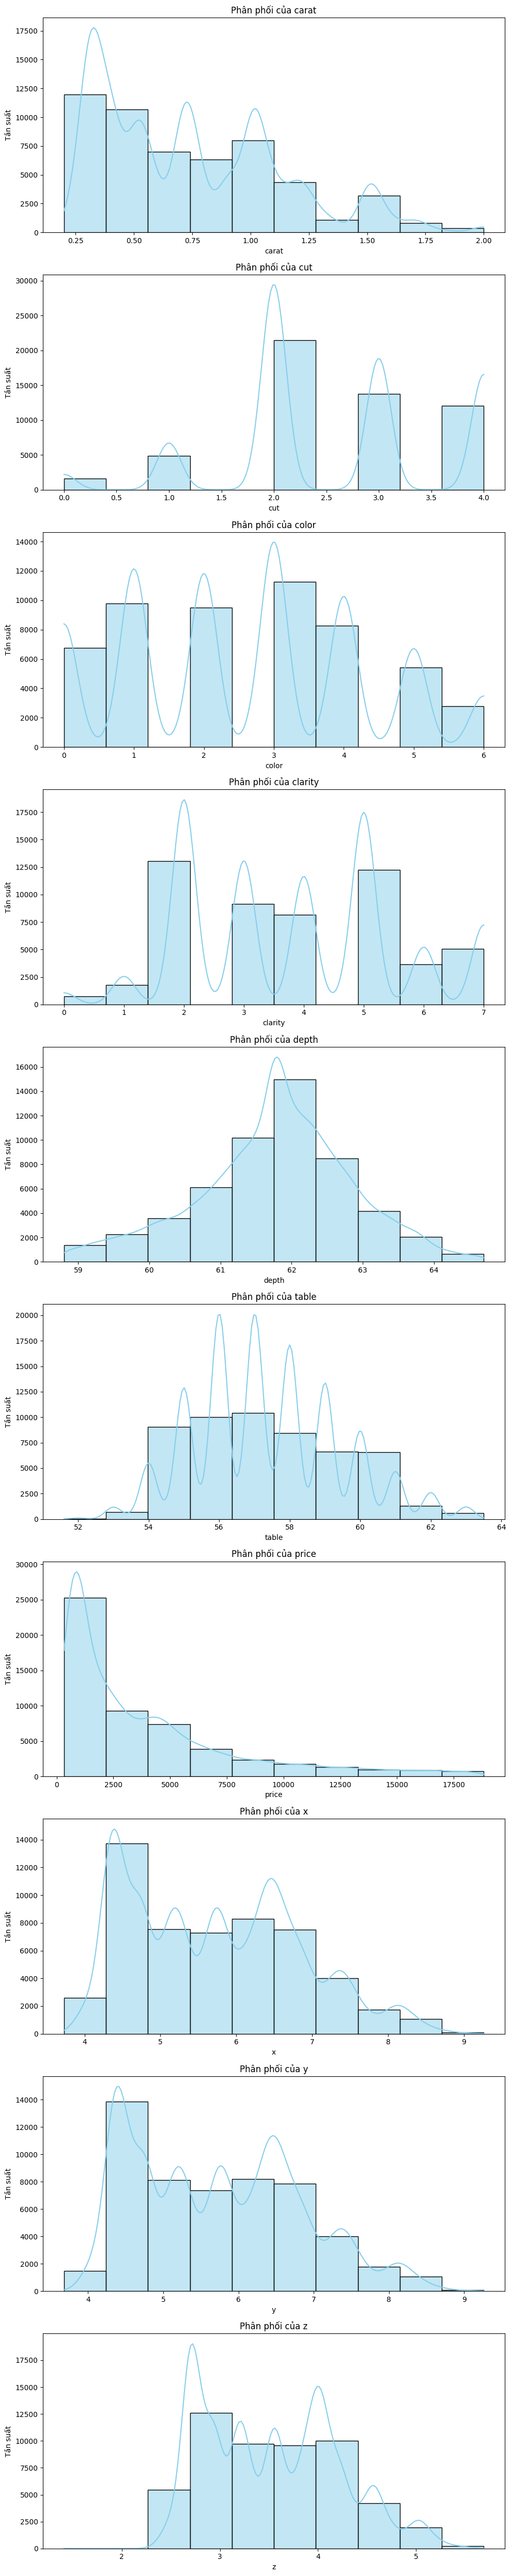

In [27]:
# kiểm tra lại phân phối chuẩn
plt.figure(figsize=(10, 5 * len(diamond.columns)))  # Điều chỉnh chiều cao theo số biến
for i, column in enumerate(diamond.columns):
    plt.subplot(len(diamond.columns), 1, i + 1)
    sns.histplot(diamond[column], kde=True, bins=10, color="skyblue")
    plt.title(f"Phân phối của {column}")
    plt.xlabel(column)
    plt.ylabel("Tần suất")

plt.tight_layout()  # Căn chỉnh bố cục
plt.show()

### nhận xét 
các biến đã có hình dạng phân phối chuẩn hơn rồi

In [28]:
# Tính VIF
X = diamond.drop(columns=["price"])  # Biến mục tiêu giả định là X4
X["Intercept"] = 1  # Thêm intercept cho VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

     Feature          VIF
0      carat     4.914938
1        cut     1.094065
2      color     1.084197
3    clarity     1.064935
4      depth     1.741394
5      table     1.176156
6          x   307.439443
7          y   318.492628
8          z    86.408929
9  Intercept  7072.639199


In [29]:
# #tạo ra biến mới 
# diamond['shape'] = diamond['x'] + diamond['y'] + diamond['z']

In [30]:
# chuẩn hóa dữ liệu
scaler = MinMaxScaler()
diamond_scaler = diamond.drop(['price'],axis=1)
diamond_scaler_x = scaler.fit_transform(diamond_scaler)
diamond_scaler_y = scaler.fit_transform(diamond['price'].values.reshape(-1,1))

### xây dựng mô hình

### mô hình LinerRegression

train test

In [31]:
X = diamond_scaler_x
y = diamond_scaler_y

In [32]:
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Huấn luyện mô hình
model_liner = LinearRegression()
model_liner.fit(X_train, y_train)

LinearRegression()

In [34]:
# Dự đoán
y_pred_l = model_liner.predict(X_test)

In [35]:
r2_liner = r2_score(y_test, y_pred_l)
mae_liner = mean_absolute_error(y_test, y_pred_l)
rmse_liner = np.sqrt(mean_squared_error(y_test, y_pred_l))

In [36]:
# Đánh giá mô hình
print("=== Train-Test Split ===")
print(f"R² Score: {r2_liner:.4f}")
print(f"MAE: {mae_liner:.4f}")
print(f"RMSE: {rmse_liner:.4f}")

=== Train-Test Split ===
R² Score: 0.8129
MAE: 0.0706
RMSE: 0.0930


=== Train-Test Split ===

R² Score: 0.8129

MAE: 0.0706

RMSE: 0.0930

với x là biến carat, cut, color, clarity, depth, table, x, y, z

=== Train-Test Split ===

R² Score: 0.5870

MAE: 0.0730

RMSE: 0.1381

với x là biến carat, cut, color, clarity, depth, table

k-fold

In [37]:
# Khởi tạo mô hình và K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model_liner = LinearRegression()

In [38]:
# Tính R² Score với K-Fold
r2_scores = cross_val_score(model_liner, X, y, cv=kfold, scoring="r2")
print("\n=== K-Fold Cross Validation ===")
print(f"R² Scores: {r2_scores}")
print(f"Mean R² Score: {np.mean(r2_scores):.4f}")


=== K-Fold Cross Validation ===
R² Scores: [0.81293316 0.81152306 0.8138555  0.82024126 0.81485511]
Mean R² Score: 0.8147


=== K-Fold Cross Validation ===

R² Scores: [0.81293316 0.81152306 0.8138555  0.82024126 0.81485511]

Mean R² Score: 0.8147

với x là biến carat, cut, color, clarity, depth, table, x, y, z

=== K-Fold Cross Validation ===

R² Scores: [0.58697212 0.60169216 0.57623422 0.5853991  0.58728665]

Mean R² Score: 0.5875

với x là biến carat, cut, color, clarity, depth, table

In [39]:
# MAE và RMSE thủ công với K-Fold
mae_list = []
rmse_list = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model_liner.fit(X_train, y_train)
    y_pred = model_liner.predict(X_test)
    
    mae_list.append(mean_absolute_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))

print(f"Mean MAE: {np.mean(mae_list):.4f}")
print(f"Mean RMSE: {np.mean(rmse_list):.4f}")

Mean MAE: 0.0705
Mean RMSE: 0.0928


Mean MAE: 0.0705

Mean RMSE: 0.0928

với x là biến carat, cut, color, clarity, depth, table, x, y, z

Mean MAE: 0.0727

Mean RMSE: 0.1384

với x là biến carat, cut, color, clarity, depth, table

### mô hình random forest

train test

In [40]:
# Khởi tạo mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [41]:
# Huấn luyện mô hình
rf_model.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=42)

In [42]:
# Dự đoán trên tập test
y_pred_rf = rf_model.predict(X_test)

In [43]:
# Đánh giá mô hình
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print("=== Random Forest Model ===")
print(f"R² Score: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")


=== Random Forest Model ===
R² Score: 0.9784
MAE: 0.0151
RMSE: 0.0318


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


=== Random Forest Model ===

R² Score: 0.9784

MAE: 0.0151

RMSE: 0.0318

với x là biến carat, cut, color, clarity, depth, table, x, y, z

=== Random Forest Model ===

R² Score: 0.9774

MAE: 0.0160

RMSE: 0.0325

với x là biến carat, cut, color, clarity, depth, table

k-fold

In [44]:
# Khởi tạo mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Khởi tạo K-Fold (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [45]:
# Sử dụng cross_val_score để đánh giá R²
r2_scores = cross_val_score(rf_model, X, y.ravel(), cv=kf, scoring='r2')

# Sử dụng cross_val_score để đánh giá MAE
mae_scores = cross_val_score(rf_model, X, y.ravel(), cv=kf, scoring='neg_mean_absolute_error')

# In kết quả
print("=== K-Fold Cross Validation (Random Forest) ===")
print(f"R² Scores: {r2_scores}")
print(f"R² Mean: {np.mean(r2_scores):.4f}")

print(f"\nMAE Scores: {-mae_scores}")  # Lấy giá trị dương
print(f"MAE Mean: {-np.mean(mae_scores):.4f}")

=== K-Fold Cross Validation (Random Forest) ===
R² Scores: [0.98153474 0.97961041 0.98027733 0.98037211 0.9783576 ]
R² Mean: 0.9800

MAE Scores: [0.01476446 0.01479792 0.01464453 0.01494286 0.01507427]
MAE Mean: 0.0148


=== K-Fold Cross Validation (Random Forest) ===

R² Scores: [0.98153474 0.97961041 0.98027733 0.98037211 0.9783576 ]

R² Mean: 0.9800

MAE Scores: [0.01476446 0.01479792 0.01464453 0.01494286 0.01507427]

MAE Mean: 0.0148

với x là biến carat, cut, color, clarity, depth, table, x, y, z

=== K-Fold Cross Validation (Random Forest) ===

R² Scores: [0.9768488  0.97521019 0.97799512 0.97790111 0.9773748 ]

R² Mean: 0.9771


MAE Scores: [0.01604741 0.01626254 0.0157798  0.01594162 0.01597298]

MAE Mean: 0.0160

với x là biến carat, cut, color, clarity, depth, table

In [46]:
# Xây dựng mô hình Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [47]:
# Dự đoán trên tập test
y_pred_t = tree_model.predict(X_test)

In [48]:
# Đánh giá mô hình
r2_t = r2_score(y_test, y_pred_t)
mae_t = mean_absolute_error(y_test, y_pred_t)
rmse_t = np.sqrt(mean_squared_error(y_test, y_pred_t))

print(f"R² Score: {r2_t:.4f}")
print(f"MAE: {mae_t:.4f}")
print(f"RMSE: {rmse_t:.4f}")

R² Score: 0.9616
MAE: 0.0201
RMSE: 0.0423


R² Score: 0.9616

MAE: 0.0201

RMSE: 0.0423

với x là biến carat, cut, color, clarity, depth, table, x, y, z

R² Score: 0.9641

MAE: 0.0199

RMSE: 0.0409

với x là biến carat, cut, color, clarity, depth, table

### đánh giá và so sánh các mô hình

In [49]:
results = [
    {'Model': 'Linear Regression', 'R² Score': r2_liner, 'MAE': mae_liner, 'RMSE': rmse_liner},
    {'Model': 'Random Forest', 'R² Score': r2_rf, 'MAE': mae_rf, 'RMSE': rmse_rf},
    {'Model': 'Decision Tree', 'R² Score': r2_t, 'MAE': mae_t, 'RMSE': mae_t}
]

In [50]:
# Chuyển kết quả thành DataFrame
results_df = pd.DataFrame(results)
print(results_df)

               Model  R² Score       MAE      RMSE
0  Linear Regression  0.812933  0.070559  0.092954
1      Random Forest  0.978358  0.015074  0.031773
2      Decision Tree  0.961574  0.020058  0.020058


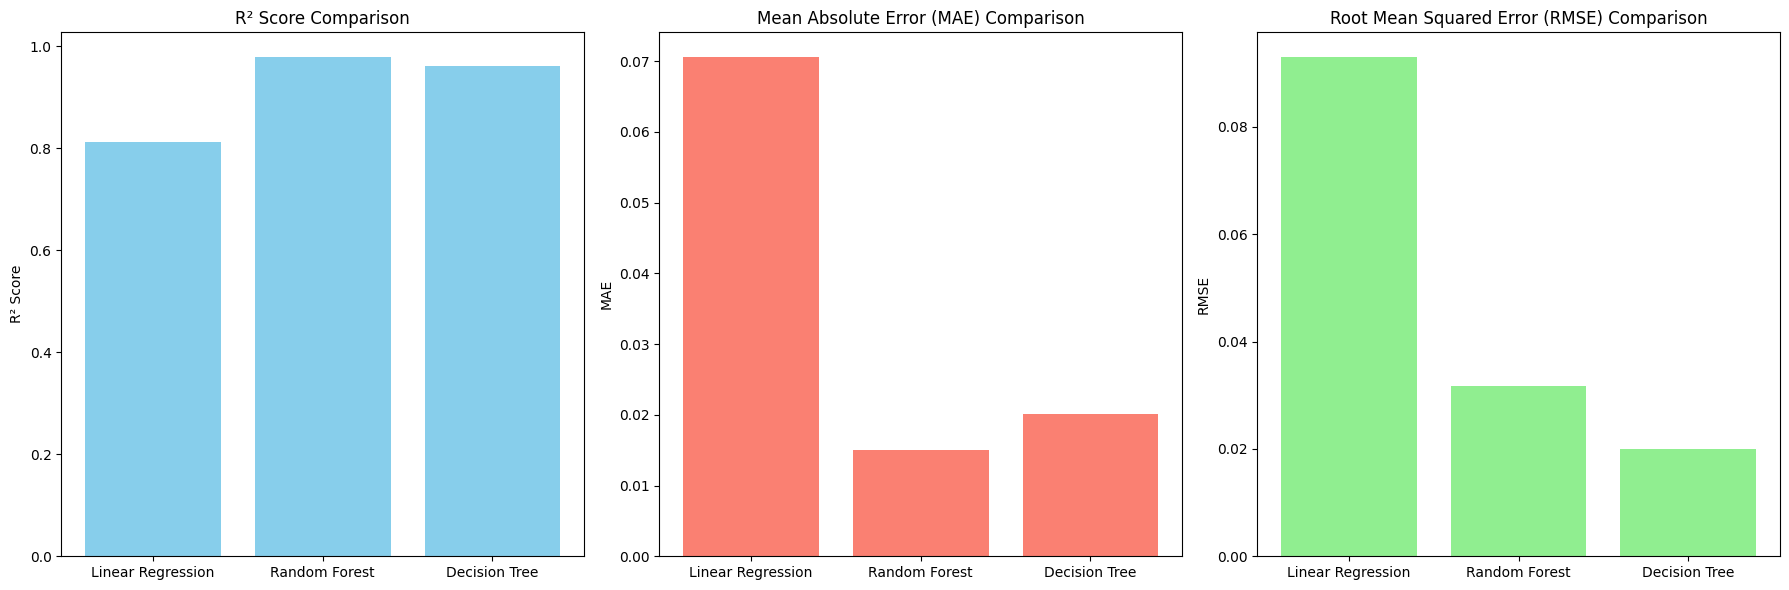

In [51]:
# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Vẽ R² Score
axes[0].bar(results_df['Model'], results_df['R² Score'], color='skyblue')
axes[0].set_title('R² Score Comparison')
axes[0].set_ylabel('R² Score')

# Vẽ MAE
axes[1].bar(results_df['Model'], results_df['MAE'], color='salmon')
axes[1].set_title('Mean Absolute Error (MAE) Comparison')
axes[1].set_ylabel('MAE')

# Vẽ RMSE
axes[2].bar(results_df['Model'], results_df['RMSE'], color='lightgreen')
axes[2].set_title('Root Mean Squared Error (RMSE) Comparison')
axes[2].set_ylabel('RMSE')

plt.tight_layout()
plt.show()

### nhận xét:
mô hình random forest đối với dataset chạy tốt nhất, mô hình rf có hiệu suất cao nhất và sai số cũng thấp 

kết luận mô hình random forest này tốt nhất